In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Square Error: [26.06174928]


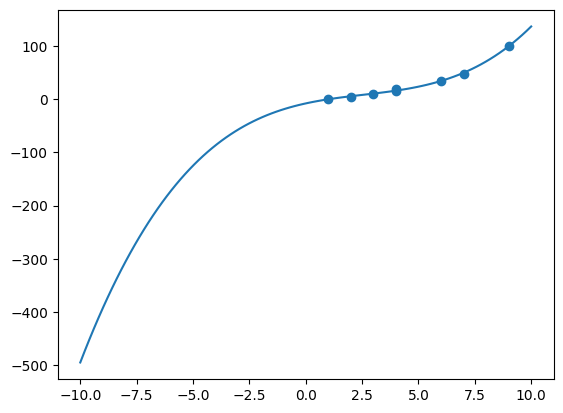

In [ ]:
# Regression Data
r_data = np.array([[1, 2, 3, 4, 4, 6, 7, 9], [1, 4, 9, 20, 15, 35, 48, 100]])

# Degree of Polynomial
n = 3

# Coefficient Matrix
c_matrix = np.zeros((n+1, n+1))
for i in range(0, n+1):
  for j in range(0, n+1):
    c_matrix[i][j] = np.sum(r_data[0, :] ** (i + j))

# Y Value Matrix
y_matrix = np.zeros((n+1, 1))
for i in range(0, n+1):
  y_matrix[i][0] = np.sum(r_data[1, :] * (r_data[0, :] ** (i)))

# Inverse of Coefficient Matrix
inv_c_matrix = sp.linalg.inv(c_matrix)

# Multiply Inverse Coefficient Matrix and Y Value Matrix to get Solution Matrix
s_matrix = np.dot(inv_c_matrix, y_matrix)

# Graph Data
plt.scatter(r_data[0, :], r_data[1, :])

# Returns Y Value
def y_val(coefs: np.ndarray, x: float):
  """Calculate y value for any polynomial with coefs"""
  y_val = 0.0
  for idx, coef in enumerate(coefs):
    y_val += coef * (x ** idx)
  return y_val

# Function Graphing Function
def poly_plot(coefs: np.ndarray):
  x_arr = np.linspace(-10, 10, num=100)
  y_arr = [y_val(coefs, x) for x in x_arr]
  plt.plot(x_arr, y_arr)

# Cost/Total Error Function
def cost(data_1: np.ndarray, coefs: np.ndarray):
  error = 0
  for i in range(data_1.shape[1]):
    error += (y_val(coefs, data_1[0, i]) - data_1[1, i]) ** 2
  print(f"Square Error: {error}")

poly_plot(s_matrix)
cost(r_data, s_matrix)

(2, 8)